# Image Quatization

La Cuantificación, involucrada en el procesamiento de imagen, es una técnica de compresión con pérdida que consiste en comprimir un rango de valores a un único valor. Cuando el número de símbolos discretos en un flujo dado se reduce, el flujo se vuelve más comprensible. Por ejemplo, reducir el número de colores requeridos para representar una imagen digital, hace posible reducir el tamaño de su archivo.

In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
sns.set()

In [ ]:
# cargar una imagen con matplotlib
# from matplotlib import image as mpimg
#
# mpimg.imread("image.jpg")

In [3]:
# cargar una imagen con scikit
image = datasets.load_sample_image("flower.jpg")
image

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

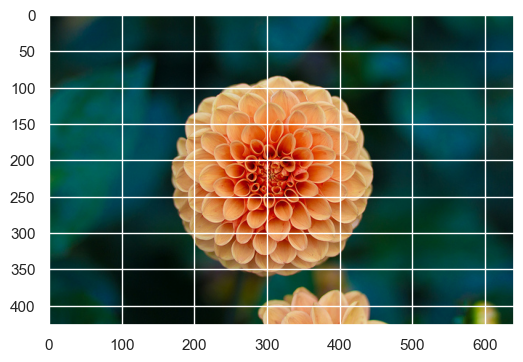

In [29]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(image)

In [7]:
type(image)

numpy.ndarray

In [8]:
image.shape

(427, 640, 3)

In [9]:
image.ndim

3

In [11]:
print(image[0][0][0])
print(image[0][0][1])
print(image[0][0][2])

2
19
13


In [12]:
print(image[150][300][0])
print(image[150][300][1])
print(image[150][300][2])

237
122
41


# Imagen en 2d

In [15]:
image.shape

(427, 640, 3)

In [17]:
# obtener la imagen en 2d para usar en KMeans
height, width, channel = image.shape
image_2d = image.reshape(height * width, channel)
image_2d.shape

(273280, 3)

# KMeans

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
labels = kmeans.fit_predict(image_2d)
labels

array([2, 2, 2, ..., 2, 2, 2])

In [39]:
kmeans.cluster_centers_

array([[  0.80874805,  78.64791513,  82.45486069],
       [162.22058033, 115.42315959,  63.21507254],
       [  6.09378713,  28.7233918 ,  20.36452477],
       [211.10604632,  90.07618149,  26.41842188],
       [226.65564455, 181.29819245, 127.29575712],
       [  3.97825115,  53.96066623,  49.33196104],
       [218.76624111, 147.32401422,  85.24802036],
       [169.52461562,  23.61344929,   4.94113993],
       [ 60.43875502,  64.78600115,  30.81267929]])

# Resultado a 3d

In [40]:
rgb_codes = kmeans.cluster_centers_.round(0).astype(int)
rgb_codes

array([[  1,  79,  82],
       [162, 115,  63],
       [  6,  29,  20],
       [211,  90,  26],
       [227, 181, 127],
       [  4,  54,  49],
       [219, 147,  85],
       [170,  24,   5],
       [ 60,  65,  31]])

In [41]:
image_3d = np.reshape(rgb_codes[labels], (height, width, channel))
image_3d

array([[[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       [[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       [[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       ...,

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]],

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]],

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]]])

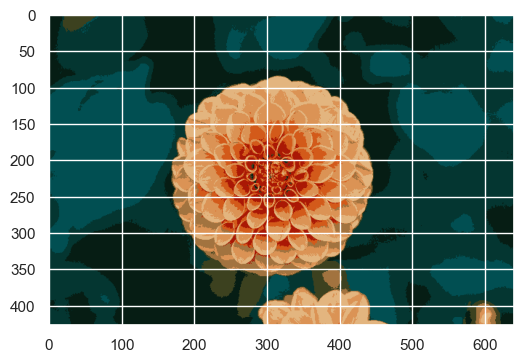

In [42]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(image_3d)